# Sprint10課題 深層学習スクラッチニューラルネットワーク

## 2.スクラッチによる実装

#### データセットの用意

In [1]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


#### データセットの確認

In [2]:
print(X_train.shape) # (60000, 784)
print(X_test.shape) # (10000, 784)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

## 3.平滑化

In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [4]:
X_train[0].shape

(784,)

#### 画像データの可視化

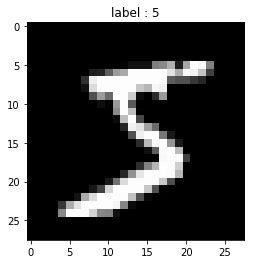

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

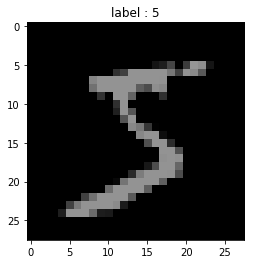

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

#### 前処理

In [7]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [9]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


### 【問題1】ニューラルネットワーク分類器のクラスを作成

In [13]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self,n_features, n_nodes1, n_nodes2, n_output, batch_size, verbose = True, sigma=0.01, alpha=0.001, epoch=10):
        self.verbose = verbose
        self.epoch = epoch
        self.batch_size = batch_size
        self.n_output = n_output
        self.sigma = sigma
        self.alpha = alpha
        self.B1 = np.random.rand(n_nodes1)
        self.B2 = np.random.rand(n_nodes2)
        self.B3 = np.random.rand(n_output)
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 =  sigma * np.random.randn(n_nodes2, n_output)
        self.B1_grad = 0
        self.B2_grad = 0
        self.B3_grad = 0
        self.W1_grad = 0
        self.W2_grad = 0
        self.W3_grad = 0
        self.train_cost = np.zeros(epoch)
        self.val_cost = np.zeros(epoch)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """


        #Hot-one表現
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_one_hot = enc.fit_transform(y[:, np.newaxis]) #正解ラベルをOne-Hot表現にする
        y_one_hot_val = enc.fit_transform(y_val[:, np.newaxis])
        
        #学習
        for i in range(self.epoch):
            #バッチ作成
            get_mini_batch = GetMiniBatch(X, y_one_hot, batch_size)

            for mini_X_train, mini_y_train in get_mini_batch:
                y_hat =  self._forward(mini_X_train)
                self._backward(mini_X_train, mini_y_train, y_hat)
            train_cost = np.sum(-mini_y_train*np.log(self._forward(mini_X_train)))
            val_cost = np.sum(-y_one_hot_val*np.log(self._forward(X_val)))
            self.train_cost[i] = train_cost
            self.val_cost[i] = val_cost

        print('train_cost', self.train_cost)
        print('val_cost', self.val_cost)

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()


    def _backward(self, X, y, yhat):

        A1 = np.dot(X, self.W1) + self.B1
        Z1 = np.tanh(A1)
        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = np.tanh(A2)

        #Layer3
        delta1 = yhat - y
        self.B3_grad = delta1
        self.W3_grad = np.dot(Z2.T, delta1)

        #Layer2
        delta2 = (1-np.tanh(A2)**2) * np.dot(delta1, self.W3.T)
        self.B2_grad = delta2
        self.W2_grad = np.dot(Z1.T, delta2)

        #Layer1
        delta3 = (1-np.tanh(A1)**2) * np.dot(delta2, self.W2.T)
        self.B1_grad = delta3
        self.W1_grad = np.dot(X.T, delta3)

        #更新処理
        self.B1 -= self.alpha * np.average(self.B1_grad, axis=0)
        self.B2 -= self.alpha * np.average(self.B2_grad, axis=0)
        self.B3 -= self.alpha * np.average(self.B3_grad, axis=0)
        self.W1 -= self.alpha * self.W1_grad
        self.W2 -= self.alpha * self.W2_grad
        self.W3 -= self.alpha * self.W3_grad


    def _forward(self, X):
        #フォワードプロバゲーション
        A1 = np.dot(X, self.W1) + self.B1
        Z1 = np.tanh(A1)

        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = np.tanh(A2)

        A3 = np.dot(Z2, self.W3) + self.B3

        #ソフトマックス関数
        Z3 = self._softmax(A3)

        return Z3

    def _softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T

        x = x - np.max(x)
        return np.exp(x) / np.sum(np.exp(x))

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        return np.argmax(self._forward(X), axis=1)

    def plot(self):
        plt.figure(figsize=(10, 5))
        plt.title("NN cost")
        plt.xlabel("epoch")
        plt.ylabel("cost")
        plt.plot(self.train_cost, label="train_cost")
        plt.plot(self.val_cost, label="val_cost")
        plt.yscale("log")
        plt.legend()

In [99]:
batch_size = 10 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）

NN = ScratchSimpleNeuralNetrowkClassifier(n_features, n_nodes1, n_nodes2, n_output, batch_size)

In [100]:
NN.fit(X_train, y_train, X_val, y_val)

train_cost [1.89087628 0.96656487 0.58357309 0.36212775 0.24022275 0.17650411
 0.14381672 0.12281029 0.10615093 0.09278768]
val_cost [5310.11425603 3999.88346235 3404.77231242 2929.86589263 2555.04194264
 2255.08737539 2025.34361913 1847.38661934 1703.66710711 1584.58358912]



#### 推定

In [101]:
predict = NN.predict(X_test)

## 4.検証

### 【問題2】学習曲線のプロット

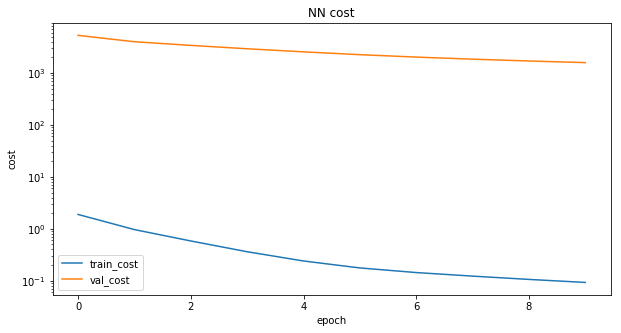

In [102]:
NN.plot()

val_costが大きい為、わかりづらいグラフになってしまった。  
train_valの値としては問題ないと思われる。

### 【問題3】指標値の算出

In [103]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predict)

0.9609